In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid

In [2]:
BATCH_SIZE = 32
HIDDEN_SIZE = 256
LOAD_MODEL = False
USE_TRANSFER_LEARNING = False

In [3]:
class Graph2VecEmbeddingsDataset(Dataset):
    """Graph2Vec Embeddings dataset."""

    def __init__(self, embeddings, labels=None, transform=None):
        """
        Args:
            embeddings (pd.dataframe): Pandas Dataframe with the graph2vec embeddings
            labels : Labels indicating intelligence for the respective individual
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.embeddings = embeddings
        self.labels = labels
        self.transform = transforms.Compose([transforms.ToTensor()])

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):

        sample = torch.tensor(self.embeddings.iloc[idx]).float()

        if self.labels is not None:
            return sample, torch.tensor(self.labels.iloc[idx]).float()
        else:
            return sample

In [4]:
raw_y = pd.read_csv("intelligence_label.csv")

In [5]:
raw_y

,subjectkey,nihtbx_totalcomp_uncorrected
0,NDARINV003RTV85,-0.790265
1,NDARINV007W6H7B,-0.571433
2,NDARINV00BD7VDC,0.632147
3,NDARINV00LJVZK2,0.194482
4,NDARINV00NPMHND,-0.680849
...,...,...
6907,NDARINVZZL0VA2F,-0.680849
6908,NDARINVZZLZCKAY,-0.462016
6909,NDARINVZZPKBDAC,-0.680849
6910,NDARINVZZZ2ALR6,-0.243184


In [6]:
# Read data, make fake y and drop the "type" column

#data = pd.read_csv("data/nci1.csv")
#data['y'] = np.random.normal(100,30, size=len(data))
#data = data.drop("type", axis=1)

data = pd.read_csv("features/struct_embedding.csv")
#cols_to_norm = data.columns#.drop("y")
#data[cols_to_norm]=(data[cols_to_norm]-data[cols_to_norm].mean())/data[cols_to_norm].std()
#data = data.dropna()

In [7]:
subjid=data['type'].values[9].split('/')[-1].split('_')[-1]

In [31]:
data['type'].values[9][-15:]

'NDARINV040B4TRC'

In [37]:
data['type'][0]

'/home/ubuntu/Stella/MLVU_multimodality/graph2vec/structural_graph_for_graph2vec_1212/graph2vec_structural_graph_NDARINV003RTV85'

In [29]:
subjid

'NDARINV040B4TRC'

In [22]:
raw_y['subjectkey'][0]

'NDARINV003RTV85'

In [8]:
y = []
for i in data['type']:
    subjid = i.split('/')[-1].split('_')[-1]
    for j in range(len(raw_y)):
        if subjid == raw_y['subjectkey'][j]:
            y.append(raw_y['nihtbx_totalcomp_uncorrected'][j])

In [9]:
len(y)

2085

In [10]:
data

,type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.060564,-0.090097,0.017879,-0.233405,-0.031025,-0.161997,-0.110498,-0.106946,0.161249,...,0.154834,-0.357470,-0.041721,0.027009,0.074247,0.188864,-0.069622,-0.065493,-0.019565,-0.100768
1,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.058420,-0.086559,0.019345,-0.226949,-0.031319,-0.155380,-0.109569,-0.100978,0.149402,...,0.149971,-0.341140,-0.044229,0.026961,0.069826,0.183943,-0.067535,-0.063860,-0.019622,-0.093313
2,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.066414,-0.084501,0.019682,-0.234007,-0.033996,-0.160188,-0.116341,-0.105766,0.160227,...,0.154652,-0.353492,-0.039726,0.028335,0.074511,0.186440,-0.072687,-0.069850,-0.023465,-0.104869
3,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.061569,-0.079573,0.018303,-0.221120,-0.028189,-0.150833,-0.103980,-0.096945,0.152231,...,0.146012,-0.330881,-0.039162,0.021560,0.068880,0.172749,-0.061961,-0.060701,-0.015221,-0.097385
4,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.063210,-0.087080,0.025141,-0.234608,-0.028360,-0.162248,-0.116670,-0.104763,0.154640,...,0.151280,-0.348356,-0.039079,0.024286,0.072855,0.182617,-0.066336,-0.065799,-0.023753,-0.103925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.052150,-0.077419,0.014720,-0.209189,-0.026127,-0.145545,-0.099978,-0.094635,0.141908,...,0.137550,-0.313037,-0.037452,0.020052,0.067365,0.168734,-0.060060,-0.064484,-0.016375,-0.086581
2081,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.056559,-0.080355,0.022327,-0.229628,-0.029295,-0.160573,-0.113333,-0.101679,0.155368,...,0.149303,-0.339774,-0.042790,0.025548,0.072326,0.176757,-0.066028,-0.068545,-0.019505,-0.094861
2082,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.059904,-0.084092,0.022182,-0.218934,-0.033377,-0.157618,-0.110358,-0.098928,0.148119,...,0.149383,-0.332917,-0.036531,0.026738,0.067816,0.179977,-0.069771,-0.069681,-0.022913,-0.093519
2083,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.062419,-0.086961,0.018969,-0.241844,-0.030937,-0.168730,-0.120848,-0.102684,0.162021,...,0.152759,-0.365104,-0.042149,0.024744,0.076086,0.194581,-0.067730,-0.070011,-0.015568,-0.100741


In [11]:
data['y'] = y
data = data.drop("type", axis=1)

In [12]:
data

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127,y
0,-0.060564,-0.090097,0.017879,-0.233405,-0.031025,-0.161997,-0.110498,-0.106946,0.161249,-0.466659,...,-0.357470,-0.041721,0.027009,0.074247,0.188864,-0.069622,-0.065493,-0.019565,-0.100768,-0.790265
1,-0.058420,-0.086559,0.019345,-0.226949,-0.031319,-0.155380,-0.109569,-0.100978,0.149402,-0.449210,...,-0.341140,-0.044229,0.026961,0.069826,0.183943,-0.067535,-0.063860,-0.019622,-0.093313,-0.680849
2,-0.066414,-0.084501,0.019682,-0.234007,-0.033996,-0.160188,-0.116341,-0.105766,0.160227,-0.463173,...,-0.353492,-0.039726,0.028335,0.074511,0.186440,-0.072687,-0.069850,-0.023465,-0.104869,0.632147
3,-0.061569,-0.079573,0.018303,-0.221120,-0.028189,-0.150833,-0.103980,-0.096945,0.152231,-0.431845,...,-0.330881,-0.039162,0.021560,0.068880,0.172749,-0.061961,-0.060701,-0.015221,-0.097385,-0.133767
4,-0.063210,-0.087080,0.025141,-0.234608,-0.028360,-0.162248,-0.116670,-0.104763,0.154640,-0.459196,...,-0.348356,-0.039079,0.024286,0.072855,0.182617,-0.066336,-0.065799,-0.023753,-0.103925,-0.243184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,-0.052150,-0.077419,0.014720,-0.209189,-0.026127,-0.145545,-0.099978,-0.094635,0.141908,-0.413155,...,-0.313037,-0.037452,0.020052,0.067365,0.168734,-0.060060,-0.064484,-0.016375,-0.086581,0.194482
2081,-0.056559,-0.080355,0.022327,-0.229628,-0.029295,-0.160573,-0.113333,-0.101679,0.155368,-0.451812,...,-0.339774,-0.042790,0.025548,0.072326,0.176757,-0.066028,-0.068545,-0.019505,-0.094861,1.179229
2082,-0.059904,-0.084092,0.022182,-0.218934,-0.033377,-0.157618,-0.110358,-0.098928,0.148119,-0.439615,...,-0.332917,-0.036531,0.026738,0.067816,0.179977,-0.069771,-0.069681,-0.022913,-0.093519,-0.462016
2083,-0.062419,-0.086961,0.018969,-0.241844,-0.030937,-0.168730,-0.120848,-0.102684,0.162021,-0.471974,...,-0.365104,-0.042149,0.024744,0.076086,0.194581,-0.067730,-0.070011,-0.015568,-0.100741,-0.024351


In [13]:
train_df, test_df = np.split(data.sample(frac=1, random_state=42), [int(.9*len(data))])

In [14]:
X_train, X_valid, y_train, y_valid = \
    train_test_split(train_df.iloc[:, 1:], train_df['y'], test_size=1/9, random_state=42)

In [15]:
y_test = test_df["y"]
X_test = test_df.drop("y", axis=1)

In [16]:
train_dataset = Graph2VecEmbeddingsDataset(embeddings=X_train, labels=y_train)
valid_dataset = Graph2VecEmbeddingsDataset(embeddings=X_valid, labels=y_valid)
test_dataset = Graph2VecEmbeddingsDataset(embeddings=X_test, labels=y_test)

In [17]:
train_dataset[5]

(tensor([-0.0791,  0.0202, -0.2237, -0.0260, -0.1540, -0.1060, -0.0978,  0.1563,
         -0.4445, -0.1577,  0.1053,  0.1649, -0.1205, -0.0182, -0.0742,  0.1317,
         -0.0133, -0.0345,  0.0189,  0.0866, -0.0362, -0.1538, -0.0870,  0.1135,
          0.1484, -0.0689,  0.1210, -0.0928, -0.2405,  0.0363,  0.0832,  0.2093,
          0.1253,  0.1266,  0.0497,  0.1993,  0.0338,  0.0106, -0.0174, -0.0405,
          0.0585, -0.0139, -0.1354,  0.0111,  0.0802, -0.0885,  0.0314,  0.1998,
         -0.1191,  0.0556,  0.0351, -0.0290,  0.1275,  0.0684, -0.0505, -0.0972,
         -0.0658, -0.1896,  0.0479,  0.1226,  0.1327,  0.1130, -0.2914,  0.1589,
          0.0283, -0.1357,  0.0391,  0.0880,  0.1169, -0.0051, -0.0266, -0.0902,
         -0.1583,  0.0262,  0.0880, -0.2065, -0.0679,  0.0869,  0.3149, -0.0436,
         -0.3597, -0.0374, -0.1253,  0.0345, -0.0969, -0.1100, -0.1059,  0.0954,
          0.0550, -0.1455, -0.0723,  0.0213,  0.0611, -0.2990,  0.0313, -0.0987,
          0.0367, -0.0379, -

In [18]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [19]:
dataiter = iter(train_loader)
embeddings, labels = dataiter.next()

print('embeddings shape on PyTroch : ', embeddings.size())
print('labels shape on PyTroch : ', labels.size())

embeddings shape on PyTroch :  torch.Size([32, 128])
labels shape on PyTroch :  torch.Size([32])


In [73]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        
        def init_weights(m):
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)
                m.bias.data.fill_(0.01)
        
        
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_size, 1)
        )
        
        self.layers.apply(init_weights)
        
    def forward(self, x):
        x = self.layers(x)
        return x

In [74]:
model = MLP(embeddings.size()[1], 256)

if LOAD_MODEL:
    model.load_state_dict(torch.load(PATH))
    
print(model)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=256, out_features=1, bias=True)
  )
)


In [75]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                        lr_lambda=lambda epoch: 0.95 ** epoch,
                                        last_epoch=-1,
                                        verbose=False)
loss_fn = nn.MSELoss() #will calculate RMSE next line

In [76]:
mean_train_losses = []
mean_valid_losses = []
valid_acc_list = []
epochs = 200

for epoch in range(epochs):
    model.train()
    
    train_losses = []
    valid_losses = []
    for i, (embeddings, labels) in enumerate(train_loader):
        
        optimizer.zero_grad()
        
        outputs = model(embeddings)
        
        #print("Embeddings: ", embeddings, " Output: ", outputs, " Labels: ", labels.view(-1,1))
        
        loss = torch.sqrt(loss_fn(outputs, labels.view(-1,1)))
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
            
    model.eval()
    
    with torch.no_grad():
        for i, (embeddings, labels) in enumerate(valid_loader):
            outputs = model(embeddings)
            loss = torch.sqrt(loss_fn(outputs, labels.view(-1,1)))
            
            valid_losses.append(loss.item())
            
    mean_train_losses.append(np.mean(train_losses))
    mean_valid_losses.append(np.mean(valid_losses))
    
    print('epoch : {}, train loss : {:.4f}, valid loss : {:.4f}'\
         .format(epoch+1, np.mean(train_losses), np.mean(valid_losses)))

epoch : 1, train loss : 1.1220, valid loss : 0.4197
epoch : 2, train loss : 0.9354, valid loss : 0.5664
epoch : 3, train loss : 0.7728, valid loss : 0.2548
epoch : 4, train loss : 0.6577, valid loss : 0.1317
epoch : 5, train loss : 0.5564, valid loss : 0.3504
epoch : 6, train loss : 0.4709, valid loss : 0.1336
epoch : 7, train loss : 0.3768, valid loss : 0.0620
epoch : 8, train loss : 0.3434, valid loss : 0.1282
epoch : 9, train loss : 0.3006, valid loss : 0.0850
epoch : 10, train loss : 0.2867, valid loss : 0.0926
epoch : 11, train loss : 0.2562, valid loss : 0.0930
epoch : 12, train loss : 0.2480, valid loss : 0.1258
epoch : 13, train loss : 0.2421, valid loss : 0.2151
epoch : 14, train loss : 0.2410, valid loss : 0.0992
epoch : 15, train loss : 0.2326, valid loss : 0.1454
epoch : 16, train loss : 0.2223, valid loss : 0.1840
epoch : 17, train loss : 0.2269, valid loss : 0.0905
epoch : 18, train loss : 0.2276, valid loss : 0.1784
epoch : 19, train loss : 0.2366, valid loss : 0.1658
ep

epoch : 155, train loss : 0.2143, valid loss : 0.1175
epoch : 156, train loss : 0.1822, valid loss : 0.1181
epoch : 157, train loss : 0.1987, valid loss : 0.1160
epoch : 158, train loss : 0.2175, valid loss : 0.1084
epoch : 159, train loss : 0.2026, valid loss : 0.1036
epoch : 160, train loss : 0.1905, valid loss : 0.1428
epoch : 161, train loss : 0.1896, valid loss : 0.0493
epoch : 162, train loss : 0.2041, valid loss : 0.1152
epoch : 163, train loss : 0.2035, valid loss : 0.1298
epoch : 164, train loss : 0.1983, valid loss : 0.1653
epoch : 165, train loss : 0.1970, valid loss : 0.1029
epoch : 166, train loss : 0.1964, valid loss : 0.1444
epoch : 167, train loss : 0.1994, valid loss : 0.1231
epoch : 168, train loss : 0.2126, valid loss : 0.1298
epoch : 169, train loss : 0.2147, valid loss : 0.0549
epoch : 170, train loss : 0.1944, valid loss : 0.1754
epoch : 171, train loss : 0.1982, valid loss : 0.0653
epoch : 172, train loss : 0.1988, valid loss : 0.2090
epoch : 173, train loss : 0.

In [77]:
torch.save(model.state_dict(), "models/struct_graph2vec_MLP_with_dropout_555_v2")

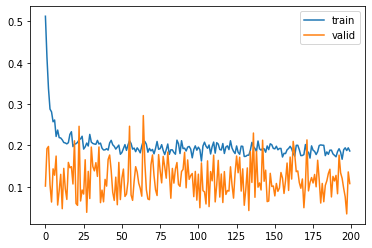

In [71]:
fig, ax = plt.subplots()
ax.plot(mean_train_losses, label='train')
ax.plot(mean_valid_losses, label='valid')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

In [78]:
model.eval()
test_losses = []
for i, (embeddings, labels) in enumerate(test_loader):
    
    pred = model(embeddings)
    loss = torch.sqrt(loss_fn(pred, labels.view(-1,1)))
    #print("Prediction:", pred.detach().numpy(), " Ground Truth:", labels.view(-1,1))
    test_losses.append(loss.item())
print("average test loss:", np.mean(test_losses))
print("average valid loss:", np.mean(mean_valid_losses))
print("average train loss:", np.mean(mean_train_losses))

average test loss: 0.7155973528112684
average valid loss: 0.133898440430473
average train loss: 0.22487263983326422


### dropout - 0.5 0.4 0.3
average test loss : 0.8960558686937604

### dropout - 0.5 0.5 0.5
average test loss: 0.7127244898251125

### dropout - 0.5 0.4 0.4 ***
average test loss: 0.7077930867671967
average valid loss: 0.1189367274461048
average train loss: 0.19893869627302266